In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


csv_file = Path('Resources/framingham.csv')

heart_analysis_df = pd.read_csv(csv_file)

heart_analysis_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


## Male vs Female Population

### Analysis:

males: 1820
females: 2420
total population: 4240


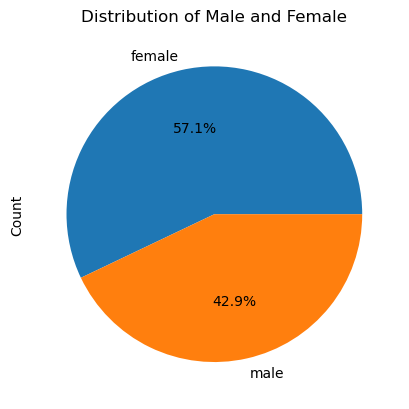

In [2]:
male_count = (heart_analysis_df['male'] == 1).sum()
female_count = (heart_analysis_df['male'] == 0).sum()
print(f'males: {male_count}')
print(f'females: {female_count}')
print(f'total population: {male_count+female_count}')
labels = ['female', 'male']
sizes = [female_count, male_count]
sex_population_df = pd.DataFrame({'Sex': labels, 'Count': sizes})
sex_population_df.plot.pie(y='Count', labels=sex_population_df['Sex'], autopct='%1.1f%%', legend=False)
plt.title('Distribution of Male and Female')
plt.show()

## Diabetes and Heart Disease

### Analysis:

The correlation between diabetes and the risk of developing coronary heart disease (CHD) over ten years reveals a significant likelihood of having CHD. Individuals with diabetes exhibit a higher rate of CHD, with 36.7% of diabetic patients experiencing CHD, compared to only 14.62% of non-diabetic individuals. This significant difference is supported by a T-test, yielding a statistic of 4.73 and a p-value of approximately 0.0000068. Being that our p-value is so low this indicates the difference between the populations is not due to random chance. The T-statistic emphasizes the strength in our argument that there is a correlation of diabetes and CHD. Diabetes is a significant risk factor for the development of CHD. These findings let us argue that diabetic individuals need to be more thorough with their health to prevent heart disease.


Diabetics: 109
Non-diabetic: 4131
Total population: 4240


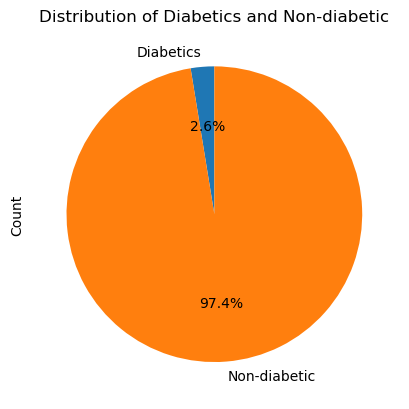

In [3]:
diabetes_count = (heart_analysis_df['diabetes'] == 1).sum()
non_diabetes_count = (heart_analysis_df['diabetes'] == 0).sum()
print(f'Diabetics: {diabetes_count}')
print(f'Non-diabetic: {non_diabetes_count}')
print(f'Total population: {diabetes_count+non_diabetes_count}')
labels = ['Diabetics', 'Non-diabetic']
sizes = [diabetes_count, non_diabetes_count]
diabetes_population_df = pd.DataFrame({'diabetes': labels, 'Count': sizes})
diabetes_population_df.plot.pie(y='Count', labels=diabetes_population_df['diabetes'], autopct='%1.1f%%', legend=False, startangle=90)
plt.title('Distribution of Diabetics and Non-diabetic')
plt.show()

In [4]:
diabetics = heart_analysis_df[heart_analysis_df['diabetes'] == 1] 
non_diabetics = heart_analysis_df[heart_analysis_df['diabetes'] == 0]

diabetics_mean = round(diabetics['TenYearCHD'].mean() * 100, 2)
non_diabetics_mean_mean = round(non_diabetics['TenYearCHD'].mean() * 100, 2)
print(f'Mean for Diabetics who have TenYearCHD: {diabetics_mean}%')
print(f'Mean for Non-diabetics who have TenYearCHD: {non_diabetics_mean_mean}%')
print(stats.ttest_ind(diabetics['TenYearCHD'], non_diabetics['TenYearCHD'], equal_var=False))

Mean for Diabetics who have TenYearCHD: 36.7%
Mean for Non-diabetics who have TenYearCHD: 14.62%
TtestResult(statistic=4.7268934172796735, pvalue=6.731476987309913e-06, df=111.05606545935888)


## Limitations (Move to Limitations section)

So it's common knowledge that people with diabetes are twice as likely to have heart disease. (Check out [Diabetes and Your Heart](https://www.cdc.gov/diabetes/library/features/diabetes-and-heart.html#:~:text=If%20you%20have%20diabetes%2C%20you,are%20to%20have%20heart%20disease.) for more info.) Since our population for dianietes is so low we would have liked a higher population of diabetics in this dat set to have more confidence in our analysis.

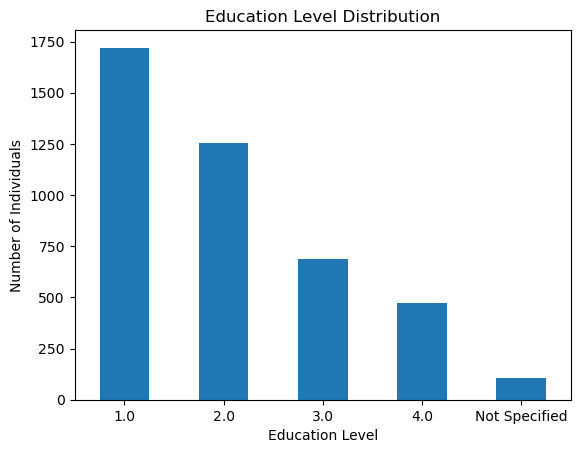

In [5]:

education_counts_df = heart_analysis_df

education_counts_df['education'] = education_counts_df['education'].astype(str)

education_counts_df['education'] = education_counts_df['education'].replace('nan', 'Not Specified')

education_counts_df = education_counts_df['education'].value_counts().sort_index()

education_counts_df.plot(kind='bar')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0) 
plt.show()

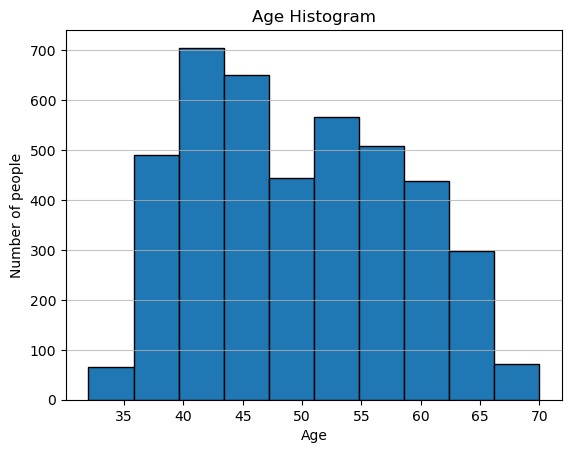

In [6]:
# Create a histogram for the age distribution
age_histogram = heart_analysis_df
plt.hist(age_histogram['age'], bins=10, edgecolor='black') 
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.grid(axis='y', alpha=0.75) 

plt.show()

In [7]:
male_df = heart_analysis_df[heart_analysis_df['male'] == 1]
female_df = heart_analysis_df[heart_analysis_df['male'] == 0]
number_of_male_TYCHD = male_df[male_df['TenYearCHD'] == 1]['TenYearCHD'].sum()
number_of_female_TYCHD = female_df[female_df['TenYearCHD'] == 1]['TenYearCHD'].sum()

male_percentage = round((number_of_male_TYCHD/male_df["TenYearCHD"].count()) * 100, 2)
female_percentage = round((number_of_female_TYCHD/female_df["TenYearCHD"].count()) * 100, 2)

print(f'Male % of heart disease: {male_percentage}%')
print(f'Female % of heart disease: {female_percentage}%')

Male % of heart disease: 18.85%
Female % of heart disease: 12.44%


## Atuls's Section

In [8]:
print('This is your teammates Atul\'s Section')

This is your teammates Atul's Section


## Ezrelle's Section

## Cigerette's and Heart Disease

Smoker: 2095
Non-smoker: 2145
Total population: 4240


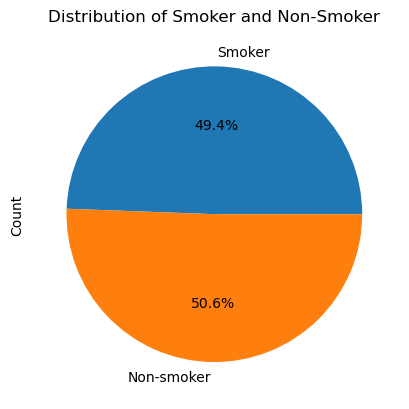

In [9]:
smoker_count = (heart_analysis_df['currentSmoker'] == 1).sum()
non_smoker_count = (heart_analysis_df['currentSmoker'] == 0).sum()
print(f'Smoker: {smoker_count}')
print(f'Non-smoker: {non_smoker_count}')
print(f'Total population: {smoker_count+non_smoker_count}')
labels = ['Smoker', 'Non-smoker']
sizes = [smoker_count, non_smoker_count]
smoker_population_df = pd.DataFrame({'currentSmoker': labels, 'Count': sizes})
smoker_population_df.plot.pie(y='Count', labels=smoker_population_df['currentSmoker'], autopct='%1.1f%%', legend=False)
plt.title('Distribution of Smoker and Non-Smoker')
plt.show()

Male Smoker: 1106
Male Non-smoker: 714
Total Male population: 1820


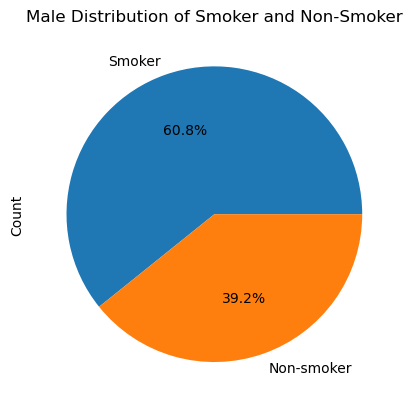

In [10]:
smoker_count = (male_df['currentSmoker'] == 1).sum()
non_smoker_count = (male_df['currentSmoker'] == 0).sum()
print(f'Male Smoker: {smoker_count}')
print(f'Male Non-smoker: {non_smoker_count}')
print(f'Total Male population: {smoker_count+non_smoker_count}')
labels = ['Smoker', 'Non-smoker']
sizes = [smoker_count, non_smoker_count]
smoker_population_df = pd.DataFrame({'currentSmoker': labels, 'Count': sizes})
smoker_population_df.plot.pie(y='Count', labels=smoker_population_df['currentSmoker'], autopct='%1.1f%%', legend=False)
plt.title('Male Distribution of Smoker and Non-Smoker')
plt.show()

Female Smoker: 989
Female Non-smoker: 1431
Total Female population: 2420


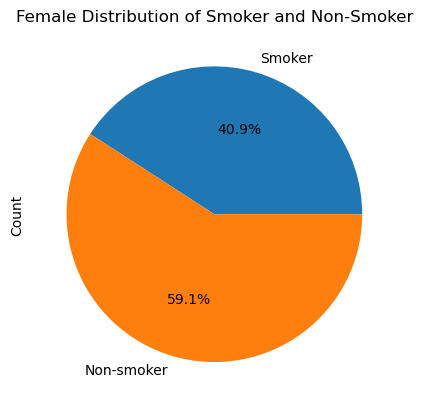

In [11]:
smoker_count = (female_df['currentSmoker'] == 1).sum()
non_smoker_count = (female_df['currentSmoker'] == 0).sum()
print(f'Female Smoker: {smoker_count}')
print(f'Female Non-smoker: {non_smoker_count}')
print(f'Total Female population: {smoker_count+non_smoker_count}')
labels = ['Smoker', 'Non-smoker']
sizes = [smoker_count, non_smoker_count]
smoker_population_df = pd.DataFrame({'currentSmoker': labels, 'Count': sizes})
smoker_population_df.plot.pie(y='Count', labels=smoker_population_df['currentSmoker'], autopct='%1.1f%%', legend=False)
plt.title('Female Distribution of Smoker and Non-Smoker')
plt.show()

## Indu's Section

In [12]:
print('This is your teammates Indu\'s Section')

This is your teammates Indu's Section


## Tianyue's Section

In [13]:
print('This is your teammates Tianyue\'s Section')

This is your teammates Tianyue's Section
